# *Cryptocurrency Price Trend Prediction*

# Data Scraping from coinmarketcap.com website

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [ ]:
crypto_date_list = []
crypto_name_list = []
crypto_symbol_list = []
crypto_market_cap_list = []
crypto_price_list = []
crypto_circulating_supply_list = []
crypto_voulume_24hr_list = []
crypto_pct_1hr_list = []
crypto_pct_24hr_list = []
crypto_pct_7day_list = []

df = pd.DataFrame()

In [ ]:
scrape_date_list = []

def scrape_date():
    url = 'https://coinmarketcap.com/historical/'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    a_tags = soup.find_all('a', class_='historical-link cmc-link')
    for tag in a_tags:
        href = tag.get('href')
        scrape_date_list.append(href)

scrape_date()
print('There are ' + str(len(scrape_date_list)) + ' dates(Sundays) available for scraping from CoinMarketCap historical data.')

There are 624 dates(Sundays) available for scraping from CoinMarketCap historical data.


In [ ]:
def scrape_data(date):
    url = 'https://coinmarketcap.com' + date
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    tr = soup.find_all('tr', attrs={'class': 'cmc-table-row'})
    count = 0
    for row in tr:
        if count == 10:
            break
        count += 1

        try:
            crypto_date = date
        except AttributeError:
            crypto_date = None

        try:
            name_column = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sticky cmc-table__cell--sortable cmc-table__cell--left cmc-table__cell--sort-by__name'})
            crypto_name = name_column.find('a', attrs={'class': 'cmc-table__column-name--name cmc-link'}).text.strip()
        except AttributeError:
            crypto_name = None

        try:
            crypto_symbol = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--left cmc-table__cell--sort-by__symbol'}).text.strip()
        except AttributeError:
            crypto_symbol = None

        try:
            crypto_market_cap = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__market-cap'}).text.strip()
        except AttributeError:
            crypto_market_cap = None

        try:
            crypto_price = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__price'}).text.strip()
        except AttributeError:
            crypto_price = None

        try:
            crypto_circulating_supply = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__circulating-supply'}).text.strip().split(' ')[0]
        except AttributeError:
            crypto_circulating_supply = None

        try:
            crypto_voulume_24hr_td = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__volume-24-h'})
            crypto_voulume_24hr = crypto_voulume_24hr_td.find('a', attrs={'class': 'cmc-link'}).text.strip()
        except AttributeError:
            crypto_voulume_24hr = None

        try:
            crypto_pct_1hr = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__percent-change-1-h'}).text.strip()
        except AttributeError:
            crypto_pct_1hr = None

        try:
            crypto_pct_24hr = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__percent-change-24-h'}).text.strip()
        except AttributeError:
            crypto_pct_24hr = None

        try:
            crypto_pct_7day = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__percent-change-7-d'}).text.strip()
        except AttributeError:
            crypto_pct_7day = None

        crypto_date_list.append(crypto_date)
        crypto_name_list.append(crypto_name)
        crypto_symbol_list.append(crypto_symbol)
        crypto_market_cap_list.append(crypto_market_cap)
        crypto_price_list.append(crypto_price)
        crypto_circulating_supply_list.append(crypto_circulating_supply)
        crypto_voulume_24hr_list.append(crypto_voulume_24hr)
        crypto_pct_1hr_list.append(crypto_pct_1hr)
        crypto_pct_24hr_list.append(crypto_pct_24hr)
        crypto_pct_7day_list.append(crypto_pct_7day)


In [ ]:
from datetime import datetime

date_format = "%Y%m%d"

# Split and convert the start date and end date
start_date = datetime.strptime(scrape_date_list[0].split('/')[-2], date_format).strftime('%Y-%m-%d')
end_date = datetime.strptime(scrape_date_list[-1].split('/')[-2], date_format).strftime('%Y-%m-%d')
print('There are ' + str(len(scrape_date_list)) + ' dates(Sundays) between ' + start_date + ' and ' + end_date)


for i in range(len(scrape_date_list)):
    scrape_data(scrape_date_list[i])
    print("completed: " + str(i+1) + " out of " + str(len(scrape_date_list)))

There are 624 dates(Sundays) between 2013-04-28 and 2025-04-06
completed: 1 out of 624
completed: 2 out of 624
completed: 3 out of 624
completed: 4 out of 624
completed: 5 out of 624
completed: 6 out of 624
completed: 7 out of 624
completed: 8 out of 624
completed: 9 out of 624
completed: 10 out of 624
completed: 11 out of 624
completed: 12 out of 624
completed: 13 out of 624
completed: 14 out of 624
completed: 15 out of 624
completed: 16 out of 624
completed: 17 out of 624
completed: 18 out of 624
completed: 19 out of 624
completed: 20 out of 624
completed: 21 out of 624
completed: 22 out of 624
completed: 23 out of 624
completed: 24 out of 624
completed: 25 out of 624
completed: 26 out of 624
completed: 27 out of 624
completed: 28 out of 624
completed: 29 out of 624
completed: 30 out of 624
completed: 31 out of 624
completed: 32 out of 624
completed: 33 out of 624
completed: 34 out of 624
completed: 35 out of 624
completed: 36 out of 624
completed: 37 out of 624
completed: 38 out of 

In [ ]:
df['Date'] = crypto_date_list
df['Name'] = crypto_name_list
df['Symbol'] = crypto_symbol_list
df['Market Cap'] = crypto_market_cap_list
df['Price'] = crypto_price_list
df['Circulating Supply'] = crypto_circulating_supply_list
df['Volume (24hr)'] = crypto_voulume_24hr_list
df['% 1h'] = crypto_pct_1hr_list
df['% 24h'] = crypto_pct_24hr_list
df['% 7d'] = crypto_pct_7day_list

In [ ]:
#Saving scraped data for backup
df.to_csv("crypto_data.csv", index=False)

# DataFrame

In [ ]:
df = pd.read_csv("crypto_data.csv")

In [ ]:
df

,Date,Name,Symbol,Market Cap,Price,Circulating Supply,Volume (24hr),% 1h,% 24h,% 7d
0,/historical/20130428/,Bitcoin,BTC,"$1,488,566,971.96",$134.21,"11,091,325",NaN,0.64%,--,--
1,/historical/20130428/,Litecoin,LTC,"$74,637,021.57",$4.3484,"17,164,230",NaN,0.80%,--,--
2,/historical/20130428/,Peercoin,PPC,"$7,250,186.65",$0.3865,"18,757,362",NaN,-0.93%,--,--
3,/historical/20130428/,Namecoin,NMC,"$5,995,997.19",$1.1072,"5,415,300",NaN,-0.05%,--,--
4,/historical/20130428/,Terracoin,TRC,"$1,503,099.40",$0.6469,"2,323,570",NaN,0.61%,--,--
...,...,...,...,...,...,...,...,...,...,...
5912,/historical/20240901/,USDC,USDC,"$34,741,759,398.02",$0.9999,"34,742,018,830","$3,944,521,734.65",-0.01%,<0.01%,0.00%
5913,/historical/20240901/,XRP,XRP,"$30,825,317,189.08",$0.548,"56,251,561,168","$681,339,684.17",-0.16%,-3.24%,-8.70%
5914,/historical/20240901/,Dogecoin,DOGE,"$13,900,911,915.58",$0.09535,"145,781,996,384","$424,515,197.32",0.41%,-5.90%,-13.08%
5915,/historical/20240901/,TRON,TRX,"$13,507,094,351.84",$0.1557,"86,769,413,081","$330,931,374.89",0.22%,-1.27%,-6.54%


In [ ]:
df.columns

Index(['Date', 'Name', 'Symbol', 'Market Cap', 'Price', 'Circulating Supply',
       'Volume (24hr)', '% 1h', '% 24h', '% 7d'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5917 entries, 0 to 5916
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                5917 non-null   object
 1   Name                5917 non-null   object
 2   Symbol              5917 non-null   object
 3   Market Cap          5917 non-null   object
 4   Price               5917 non-null   object
 5   Circulating Supply  5917 non-null   object
 6   Volume (24hr)       5570 non-null   object
 7   % 1h                5917 non-null   object
 8   % 24h               5917 non-null   object
 9   % 7d                5917 non-null   object
dtypes: object(10)
memory usage: 462.4+ KB


In [ ]:
df.shape

(5917, 10)

In [ ]:
df.size

59170

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5917 entries, 0 to 5916
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                5917 non-null   object
 1   Name                5917 non-null   object
 2   Symbol              5917 non-null   object
 3   Market Cap          5917 non-null   object
 4   Price               5917 non-null   object
 5   Circulating Supply  5917 non-null   object
 6   Volume (24hr)       5570 non-null   object
 7   % 1h                5917 non-null   object
 8   % 24h               5917 non-null   object
 9   % 7d                5917 non-null   object
dtypes: object(10)
memory usage: 462.4+ KB


The following steps are mandatory to include in the implementation:

#1. At Least 10 techniques of Data pre-processing

###1. Extract the date component from the 'Date' column and convert it to a datetime data type

In [ ]:
df['Date'] = pd.to_datetime(df['Date'].str.split('/').str[-2], format='%Y%m%d')
df

,Date,Name,Symbol,Market Cap,Price,Circulating Supply,Volume (24hr),% 1h,% 24h,% 7d
0,2013-04-28,Bitcoin,BTC,"$1,488,566,971.96",$134.21,"11,091,325",NaN,0.64%,--,--
1,2013-04-28,Litecoin,LTC,"$74,637,021.57",$4.3484,"17,164,230",NaN,0.80%,--,--
2,2013-04-28,Peercoin,PPC,"$7,250,186.65",$0.3865,"18,757,362",NaN,-0.93%,--,--
3,2013-04-28,Namecoin,NMC,"$5,995,997.19",$1.1072,"5,415,300",NaN,-0.05%,--,--
4,2013-04-28,Terracoin,TRC,"$1,503,099.40",$0.6469,"2,323,570",NaN,0.61%,--,--
...,...,...,...,...,...,...,...,...,...,...
5912,2024-09-01,USDC,USDC,"$34,741,759,398.02",$0.9999,"34,742,018,830","$3,944,521,734.65",-0.01%,<0.01%,0.00%
5913,2024-09-01,XRP,XRP,"$30,825,317,189.08",$0.548,"56,251,561,168","$681,339,684.17",-0.16%,-3.24%,-8.70%
5914,2024-09-01,Dogecoin,DOGE,"$13,900,911,915.58",$0.09535,"145,781,996,384","$424,515,197.32",0.41%,-5.90%,-13.08%
5915,2024-09-01,TRON,TRX,"$13,507,094,351.84",$0.1557,"86,769,413,081","$330,931,374.89",0.22%,-1.27%,-6.54%


### 2. Replace the dollar signs ($) and commas (,) from the 'Market Cap', 'Price' and 'Volume (24hr)'columns

In [ ]:
df['Market Cap'] = df['Market Cap'].str.replace('[$,]', '', regex=True)
df['Price'] = df['Price'].str.replace('[$,]', '', regex=True)
df['Volume (24hr)'] = df['Volume (24hr)'].str.replace('[$,]', '', regex=True)
df

,Date,Name,Symbol,Market Cap,Price,Circulating Supply,Volume (24hr),% 1h,% 24h,% 7d
0,2013-04-28,Bitcoin,BTC,1488566971.96,134.21,"11,091,325",NaN,0.64%,--,--
1,2013-04-28,Litecoin,LTC,74637021.57,4.3484,"17,164,230",NaN,0.80%,--,--
2,2013-04-28,Peercoin,PPC,7250186.65,0.3865,"18,757,362",NaN,-0.93%,--,--
3,2013-04-28,Namecoin,NMC,5995997.19,1.1072,"5,415,300",NaN,-0.05%,--,--
4,2013-04-28,Terracoin,TRC,1503099.40,0.6469,"2,323,570",NaN,0.61%,--,--
...,...,...,...,...,...,...,...,...,...,...
5912,2024-09-01,USDC,USDC,34741759398.02,0.9999,"34,742,018,830",3944521734.65,-0.01%,<0.01%,0.00%
5913,2024-09-01,XRP,XRP,30825317189.08,0.548,"56,251,561,168",681339684.17,-0.16%,-3.24%,-8.70%
5914,2024-09-01,Dogecoin,DOGE,13900911915.58,0.09535,"145,781,996,384",424515197.32,0.41%,-5.90%,-13.08%
5915,2024-09-01,TRON,TRX,13507094351.84,0.1557,"86,769,413,081",330931374.89,0.22%,-1.27%,-6.54%


### 3. Replace the commas (,) from the 'Circulating Supply' column

In [ ]:
df['Circulating Supply'] = df['Circulating Supply'].str.replace(',', '')
df

,Date,Name,Symbol,Market Cap,Price,Circulating Supply,Volume (24hr),% 1h,% 24h,% 7d
0,2013-04-28,Bitcoin,BTC,1488566971.96,134.21,11091325,NaN,0.64%,--,--
1,2013-04-28,Litecoin,LTC,74637021.57,4.3484,17164230,NaN,0.80%,--,--
2,2013-04-28,Peercoin,PPC,7250186.65,0.3865,18757362,NaN,-0.93%,--,--
3,2013-04-28,Namecoin,NMC,5995997.19,1.1072,5415300,NaN,-0.05%,--,--
4,2013-04-28,Terracoin,TRC,1503099.40,0.6469,2323570,NaN,0.61%,--,--
...,...,...,...,...,...,...,...,...,...,...
5912,2024-09-01,USDC,USDC,34741759398.02,0.9999,34742018830,3944521734.65,-0.01%,<0.01%,0.00%
5913,2024-09-01,XRP,XRP,30825317189.08,0.548,56251561168,681339684.17,-0.16%,-3.24%,-8.70%
5914,2024-09-01,Dogecoin,DOGE,13900911915.58,0.09535,145781996384,424515197.32,0.41%,-5.90%,-13.08%
5915,2024-09-01,TRON,TRX,13507094351.84,0.1557,86769413081,330931374.89,0.22%,-1.27%,-6.54%


###4.  Handle specific case of "<0.01" by replacing it with a small non-zero value, e.g., 0.005

In [ ]:
# Handle specific case of "<0.01" by replacing it with a small non-zero value, e.g., 0.005
df['% 1h'] = df['% 1h'].replace('<0.01%', '0.005%')
df['% 24h'] = df['% 24h'].replace('<0.01%', '0.005%')
df['% 7d'] = df['% 7d'].replace('<0.01%', '0.005%')
df

,Date,Name,Symbol,Market Cap,Price,Circulating Supply,Volume (24hr),% 1h,% 24h,% 7d
0,2013-04-28,Bitcoin,BTC,1488566971.96,134.21,11091325,NaN,0.64%,--,--
1,2013-04-28,Litecoin,LTC,74637021.57,4.3484,17164230,NaN,0.80%,--,--
2,2013-04-28,Peercoin,PPC,7250186.65,0.3865,18757362,NaN,-0.93%,--,--
3,2013-04-28,Namecoin,NMC,5995997.19,1.1072,5415300,NaN,-0.05%,--,--
4,2013-04-28,Terracoin,TRC,1503099.40,0.6469,2323570,NaN,0.61%,--,--
...,...,...,...,...,...,...,...,...,...,...
5912,2024-09-01,USDC,USDC,34741759398.02,0.9999,34742018830,3944521734.65,-0.01%,0.005%,0.00%
5913,2024-09-01,XRP,XRP,30825317189.08,0.548,56251561168,681339684.17,-0.16%,-3.24%,-8.70%
5914,2024-09-01,Dogecoin,DOGE,13900911915.58,0.09535,145781996384,424515197.32,0.41%,-5.90%,-13.08%
5915,2024-09-01,TRON,TRX,13507094351.84,0.1557,86769413081,330931374.89,0.22%,-1.27%,-6.54%


### 5. Replace the unchange sign (--), the smaller sign (<), the larger sign (>) and percentage sign (%) from the '% 1h', '% 24h', and '% 7d' columns

In [ ]:
# 4. Replace the unchange sign (--), the smaller sign (<), the larger sign (>) and percentage sign (%) from the '% 1h', '% 24h', and '% 7d' columns
df['% 1h'] = df['% 1h'].str.replace('--', '0').str.lstrip('>').str.lstrip('<').str.rstrip('%')
df['% 24h'] = df['% 24h'].str.replace('--', '0').str.lstrip('>').str.lstrip('<').str.rstrip('%')
df['% 7d'] = df['% 7d'].str.replace('--', '0').str.lstrip('>').str.lstrip('<').str.rstrip('%')
df

,Date,Name,Symbol,Market Cap,Price,Circulating Supply,Volume (24hr),% 1h,% 24h,% 7d
0,2013-04-28,Bitcoin,BTC,1488566971.96,134.21,11091325,NaN,0.64,0,0
1,2013-04-28,Litecoin,LTC,74637021.57,4.3484,17164230,NaN,0.80,0,0
2,2013-04-28,Peercoin,PPC,7250186.65,0.3865,18757362,NaN,-0.93,0,0
3,2013-04-28,Namecoin,NMC,5995997.19,1.1072,5415300,NaN,-0.05,0,0
4,2013-04-28,Terracoin,TRC,1503099.40,0.6469,2323570,NaN,0.61,0,0
...,...,...,...,...,...,...,...,...,...,...
5912,2024-09-01,USDC,USDC,34741759398.02,0.9999,34742018830,3944521734.65,-0.01,0.005,0.00
5913,2024-09-01,XRP,XRP,30825317189.08,0.548,56251561168,681339684.17,-0.16,-3.24,-8.70
5914,2024-09-01,Dogecoin,DOGE,13900911915.58,0.09535,145781996384,424515197.32,0.41,-5.90,-13.08
5915,2024-09-01,TRON,TRX,13507094351.84,0.1557,86769413081,330931374.89,0.22,-1.27,-6.54


### 6. Convert the numeric columns to appropriate data types, replacing invalid values with NaN

In [ ]:
numeric_cols = ['Market Cap', 'Price', 'Circulating Supply', 'Volume (24hr)', '% 1h', '% 24h', '% 7d']
df[numeric_cols] = df[numeric_cols].apply(lambda x: pd.to_numeric(x))
df

,Date,Name,Symbol,Market Cap,Price,Circulating Supply,Volume (24hr),% 1h,% 24h,% 7d
0,2013-04-28,Bitcoin,BTC,1.488567e+09,134.21000,11091325,NaN,0.64,0.000,0.00
1,2013-04-28,Litecoin,LTC,7.463702e+07,4.34840,17164230,NaN,0.80,0.000,0.00
2,2013-04-28,Peercoin,PPC,7.250187e+06,0.38650,18757362,NaN,-0.93,0.000,0.00
3,2013-04-28,Namecoin,NMC,5.995997e+06,1.10720,5415300,NaN,-0.05,0.000,0.00
4,2013-04-28,Terracoin,TRC,1.503099e+06,0.64690,2323570,NaN,0.61,0.000,0.00
...,...,...,...,...,...,...,...,...,...,...
5912,2024-09-01,USDC,USDC,3.474176e+10,0.99990,34742018830,3.944522e+09,-0.01,0.005,0.00
5913,2024-09-01,XRP,XRP,3.082532e+10,0.54800,56251561168,6.813397e+08,-0.16,-3.240,-8.70
5914,2024-09-01,Dogecoin,DOGE,1.390091e+10,0.09535,145781996384,4.245152e+08,0.41,-5.900,-13.08
5915,2024-09-01,TRON,TRX,1.350709e+10,0.15570,86769413081,3.309314e+08,0.22,-1.270,-6.54


###7. Handling Missing Values

In [ ]:
df.isnull().sum()

,0
Date,0
Name,0
Symbol,0
Market Cap,0
Price,0
Circulating Supply,0
Volume (24hr),347
% 1h,0
% 24h,0
% 7d,0


In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for imputation
numeric_cols = ['Market Cap', 'Price', 'Circulating Supply', '% 1h', '% 24h', '% 7d', 'Volume (24hr)']

# Normalization
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# KNN Imputation
imputer = KNNImputer(n_neighbors=3)
df_imputed = df_normalized.copy()
df_imputed[numeric_cols] = imputer.fit_transform(df_normalized[numeric_cols])

# Reverse normalization
df_imputed[numeric_cols] = scaler.inverse_transform(df_imputed[numeric_cols])

df = df_imputed.copy()
df

,Date,Name,Symbol,Market Cap,Price,Circulating Supply,Volume (24hr),% 1h,% 24h,% 7d
0,2013-04-28,Bitcoin,BTC,1.488567e+09,134.21000,1.109132e+07,1.010866e+08,0.64,0.000,0.00
1,2013-04-28,Litecoin,LTC,7.463702e+07,4.34840,1.716423e+07,2.916248e+06,0.80,0.000,0.00
2,2013-04-28,Peercoin,PPC,7.250187e+06,0.38650,1.875736e+07,9.851107e+04,-0.93,0.000,0.00
3,2013-04-28,Namecoin,NMC,5.995997e+06,1.10720,5.415300e+06,4.203417e+05,-0.05,0.000,0.00
4,2013-04-28,Terracoin,TRC,1.503099e+06,0.64690,2.323570e+06,5.936301e+07,0.61,0.000,0.00
...,...,...,...,...,...,...,...,...,...,...
5912,2024-09-01,USDC,USDC,3.474176e+10,0.99990,3.474202e+10,3.944522e+09,-0.01,0.005,0.00
5913,2024-09-01,XRP,XRP,3.082532e+10,0.54800,5.625156e+10,6.813397e+08,-0.16,-3.240,-8.70
5914,2024-09-01,Dogecoin,DOGE,1.390091e+10,0.09535,1.457820e+11,4.245152e+08,0.41,-5.900,-13.08
5915,2024-09-01,TRON,TRX,1.350709e+10,0.15570,8.676941e+10,3.309314e+08,0.22,-1.270,-6.54


In [ ]:
df.isnull().sum()

,0
Date,0
Name,0
Symbol,0
Market Cap,0
Price,0
Circulating Supply,0
Volume (24hr),0
% 1h,0
% 24h,0
% 7d,0


###8. Encoding Name Column

In [ ]:
# 8. Label Encoding on Name
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Name_encoded'] = label_encoder.fit_transform(df['Name'])
df

,Date,Name,Symbol,Market Cap,Price,Circulating Supply,Volume (24hr),% 1h,% 24h,% 7d,Name_encoded
0,2013-04-28,Bitcoin,BTC,1.488567e+09,134.21000,1.109132e+07,1.010866e+08,0.64,0.000,0.00,11
1,2013-04-28,Litecoin,LTC,7.463702e+07,4.34840,1.716423e+07,2.916248e+06,0.80,0.000,0.00,41
2,2013-04-28,Peercoin,PPC,7.250187e+06,0.38650,1.875736e+07,9.851107e+04,-0.93,0.000,0.00,55
3,2013-04-28,Namecoin,NMC,5.995997e+06,1.10720,5.415300e+06,4.203417e+05,-0.05,0.000,0.00,47
4,2013-04-28,Terracoin,TRC,1.503099e+06,0.64690,2.323570e+06,5.936301e+07,0.61,0.000,0.00,75
...,...,...,...,...,...,...,...,...,...,...,...
5912,2024-09-01,USDC,USDC,3.474176e+10,0.99990,3.474202e+10,3.944522e+09,-0.01,0.005,0.00,82
5913,2024-09-01,XRP,XRP,3.082532e+10,0.54800,5.625156e+10,6.813397e+08,-0.16,-3.240,-8.70,87
5914,2024-09-01,Dogecoin,DOGE,1.390091e+10,0.09535,1.457820e+11,4.245152e+08,0.41,-5.900,-13.08,27
5915,2024-09-01,TRON,TRX,1.350709e+10,0.15570,8.676941e+10,3.309314e+08,0.22,-1.270,-6.54,72


###9. Target Feature Creation based on 24hr change

In [ ]:
threshold = 0.5
df['Trend'] = df['% 24h'].apply(lambda x: 'High' if x >= threshold else 'Low')

###10. Encoding Target Column for Model Training

In [ ]:
label_encoder = LabelEncoder()
label_encoder.classes_ = np.array(['Low', 'High'])
df['Trend'] = label_encoder.transform(df['Trend'])
df

,Date,Name,Symbol,Market Cap,Price,Circulating Supply,Volume (24hr),% 1h,% 24h,% 7d,Name_encoded,Trend
0,2013-04-28,Bitcoin,BTC,1.488567e+09,134.21000,1.109132e+07,1.010866e+08,0.64,0.000,0.00,11,0
1,2013-04-28,Litecoin,LTC,7.463702e+07,4.34840,1.716423e+07,2.916248e+06,0.80,0.000,0.00,41,0
2,2013-04-28,Peercoin,PPC,7.250187e+06,0.38650,1.875736e+07,9.851107e+04,-0.93,0.000,0.00,55,0
3,2013-04-28,Namecoin,NMC,5.995997e+06,1.10720,5.415300e+06,4.203417e+05,-0.05,0.000,0.00,47,0
4,2013-04-28,Terracoin,TRC,1.503099e+06,0.64690,2.323570e+06,5.936301e+07,0.61,0.000,0.00,75,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5912,2024-09-01,USDC,USDC,3.474176e+10,0.99990,3.474202e+10,3.944522e+09,-0.01,0.005,0.00,82,0
5913,2024-09-01,XRP,XRP,3.082532e+10,0.54800,5.625156e+10,6.813397e+08,-0.16,-3.240,-8.70,87,0
5914,2024-09-01,Dogecoin,DOGE,1.390091e+10,0.09535,1.457820e+11,4.245152e+08,0.41,-5.900,-13.08,27,0
5915,2024-09-01,TRON,TRX,1.350709e+10,0.15570,8.676941e+10,3.309314e+08,0.22,-1.270,-6.54,72,0


#2. Descriptive Statistical Analysis for centrality, spread and normality

In [ ]:
df.describe()

,Date,Market Cap,Price,Circulating Supply,Volume (24hr),% 1h,% 24h,% 7d,Name_encoded,Trend
count,5917,5.917000e+03,5917.000000,5.917000e+03,5.917000e+03,5917.000000,5917.000000,5917.000000,5917.000000,5917.000000
mean,2018-12-27 13:27:14.814939904,5.033754e+10,1676.875153,2.089012e+11,4.653092e+09,-0.015271,0.391880,7.150938,40.737874,0.374007
min,2013-04-28 00:00:00,9.381047e+04,0.000005,2.737060e+05,5.523500e+02,-27.020000,-60.480000,-86.560000,0.000000,0.000000
25%,2016-02-28 00:00:00,1.352179e+08,0.315500,1.953439e+07,2.231354e+06,-0.360000,-2.000000,-6.360000,19.000000,0.000000
50%,2018-12-30 00:00:00,4.974536e+09,2.508600,1.668011e+08,3.309314e+08,0.000000,-0.010000,0.000000,33.000000,0.000000
75%,2021-10-31 00:00:00,2.794658e+10,135.530000,2.592707e+10,2.461691e+09,0.320000,1.790000,6.950000,62.000000,1.000000
max,2024-09-01 00:00:00,1.403111e+12,71333.650000,5.892894e+14,2.264685e+11,17.300000,513.530000,9000.000000,88.000000,1.000000
std,NaN,1.519972e+11,7593.724514,1.047000e+13,1.266109e+10,1.367547,9.894506,168.878627,26.708796,0.483906


In [ ]:
from scipy.stats import skew, kurtosis
import pandas as pd

stats_df = pd.DataFrame(columns=[
    'Feature', 'Mean', 'Median', 'Std Dev', 'Variance', 'Min', 'Max', 'Range', 'IQR', 'Skewness', 'Kurtosis'
])

for col in ['Market Cap',	'Price',	'Circulating Supply',	'Volume (24hr)',	'% 1h',	'% 24h',	'% 7d']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    # Create the dictionary for the row first
    row_data = {
        'Feature': col,
        'Mean': df[col].mean(),
        'Median': df[col].median(),
        'Std Dev': df[col].std(),
        'Variance': df[col].var(),
        'Min': df[col].min(),
        'Max': df[col].max(),
        'Range': df[col].max() - df[col].min(),
        'IQR': iqr,
        'Skewness': skew(df[col].dropna()),
        'Kurtosis': kurtosis(df[col].dropna())
    }

    # Use concat to add the row to the DataFrame
    stats_df = pd.concat([stats_df, pd.DataFrame([row_data])], ignore_index=True)

# Round off for better readability
stats_df = stats_df.round(2)
stats_df

<ipython-input-38-f43e76719b1f>:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stats_df = pd.concat([stats_df, pd.DataFrame([row_data])], ignore_index=True)


,Feature,Mean,Median,Std Dev,Variance,Min,Max,Range,IQR,Skewness,Kurtosis
0,Market Cap,5.033754e+10,4.974536e+09,1.519972e+11,2.310314e+22,93810.47,1.403111e+12,1.403111e+12,2.781136e+10,5.28,31.83
1,Price,1.676880e+03,2.510000e+00,7.593720e+03,5.766465e+07,0.00,7.133365e+04,7.133365e+04,1.352100e+02,6.06,39.41
2,Circulating Supply,2.089012e+11,1.668011e+08,1.047000e+13,1.096209e+26,273706.00,5.892894e+14,5.892894e+14,2.590754e+10,54.47,2968.17
3,Volume (24hr),4.653092e+09,3.309314e+08,1.266109e+10,1.603031e+20,552.35,2.264685e+11,2.264685e+11,2.459460e+09,5.59,48.73
4,% 1h,-2.000000e-02,0.000000e+00,1.370000e+00,1.870000e+00,-27.02,1.730000e+01,4.432000e+01,6.800000e-01,-1.57,56.79
5,% 24h,3.900000e-01,-1.000000e-02,9.890000e+00,9.790000e+01,-60.48,5.135300e+02,5.740100e+02,3.790000e+00,27.73,1297.84
6,% 7d,7.150000e+00,0.000000e+00,1.688800e+02,2.851999e+04,-86.56,9.000000e+03,9.086560e+03,1.331000e+01,51.14,2716.10


#3. Visual Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

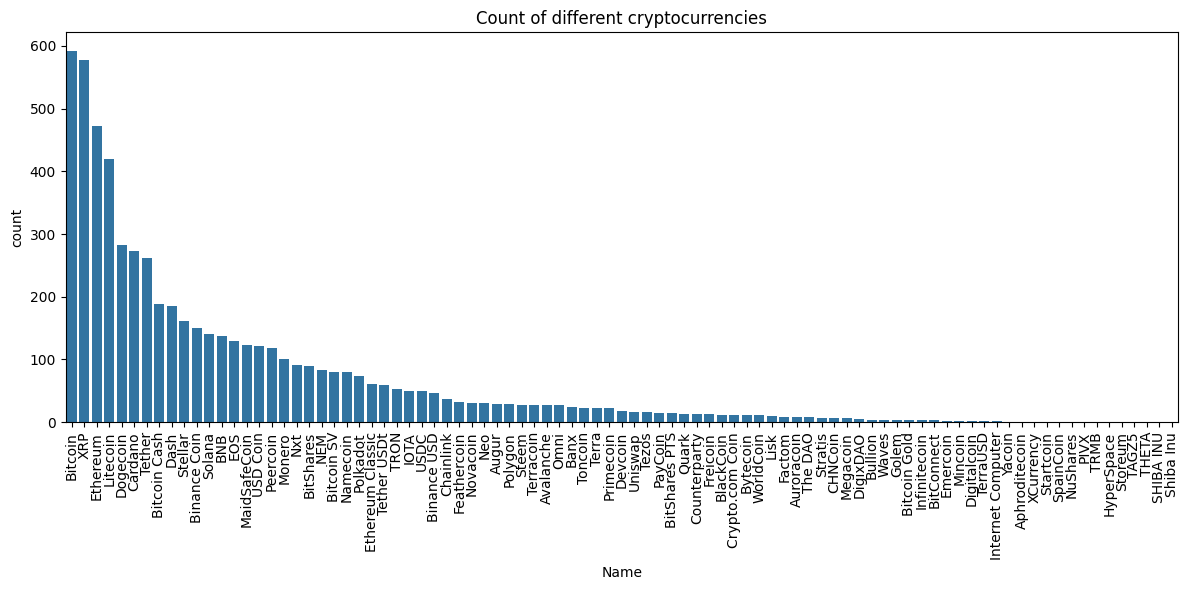

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Name', data=df, order=df['Name'].value_counts().index)
plt.title('Count of different cryptocurrencies')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

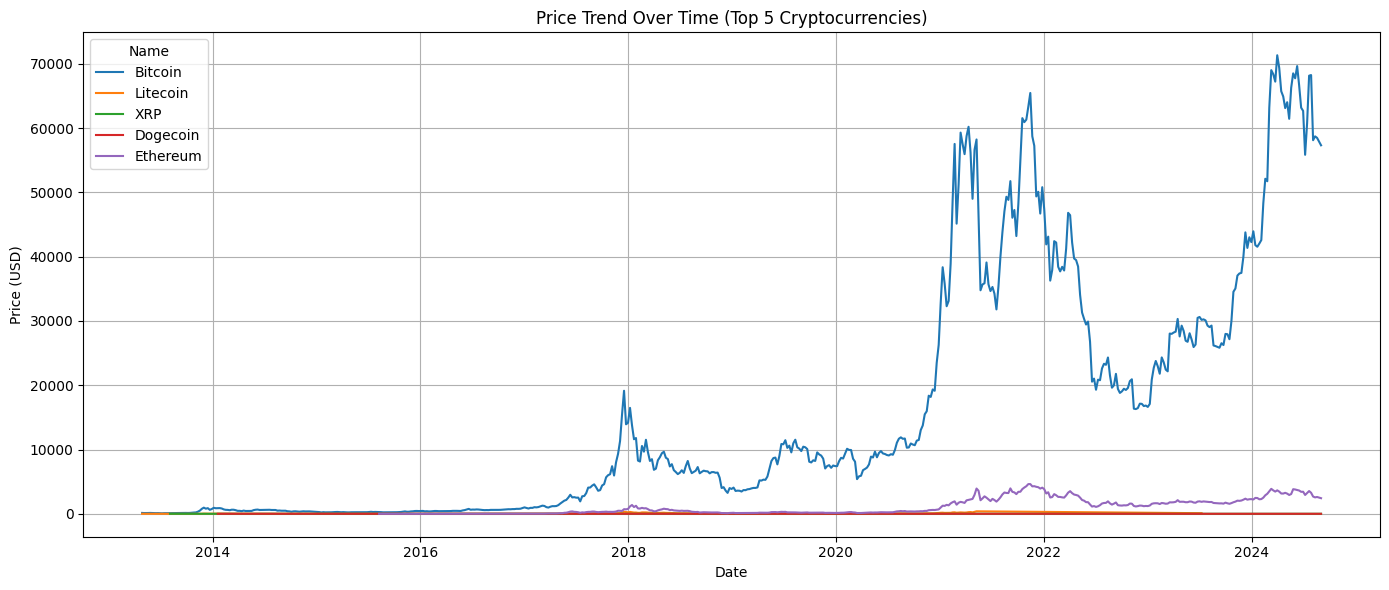

In [ ]:
# top 5 cryptocurrencies by occurrence
top_5_names = df['Name'].value_counts().head(5).index.tolist()

df_top5 = df[df['Name'].isin(top_5_names)]

plt.figure(figsize=(14, 6))
sns.lineplot(data=df_top5, x='Date', y='Price', hue='Name', palette='tab10')
plt.title('Price Trend Over Time (Top 5 Cryptocurrencies)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

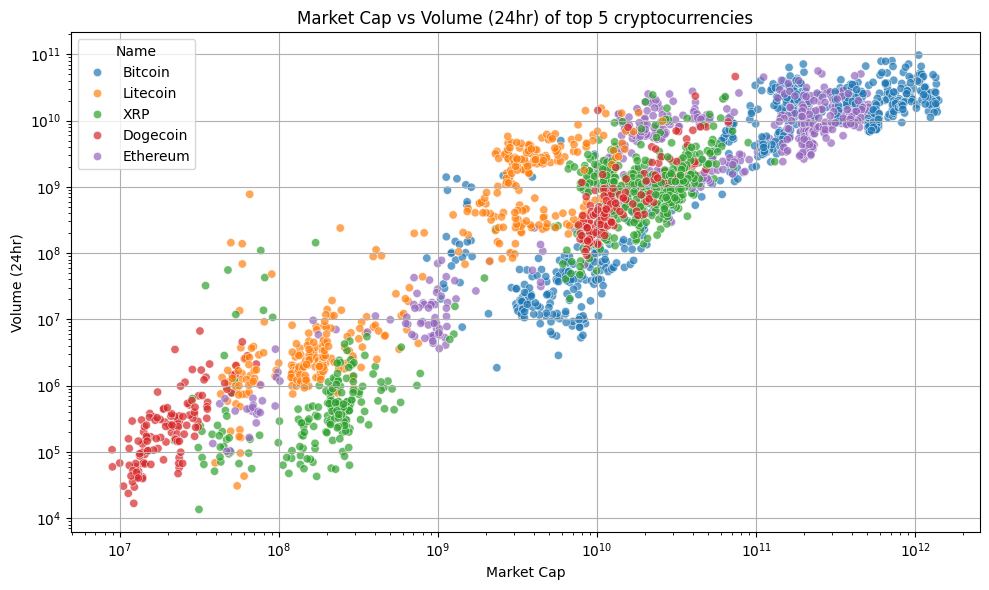

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_top5, x='Market Cap', y='Volume (24hr)', alpha=0.7, hue = 'Name')
plt.title('Market Cap vs Volume (24hr) of top 5 cryptocurrencies')
plt.xlabel('Market Cap')
plt.ylabel('Volume (24hr)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

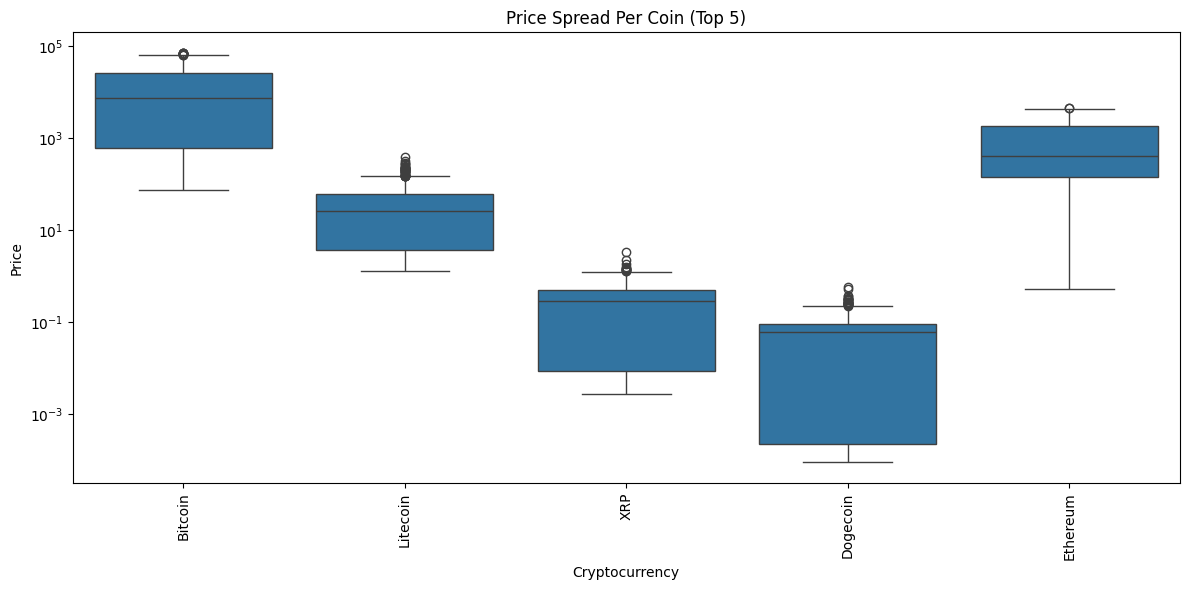

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top5, x='Name', y='Price', orient='v')
plt.xticks(rotation=90)
plt.title('Price Spread Per Coin (Top 5)')
plt.ylabel('Price')
plt.xlabel('Cryptocurrency')
plt.yscale('log')  # handle outliers better
plt.tight_layout()
plt.show()

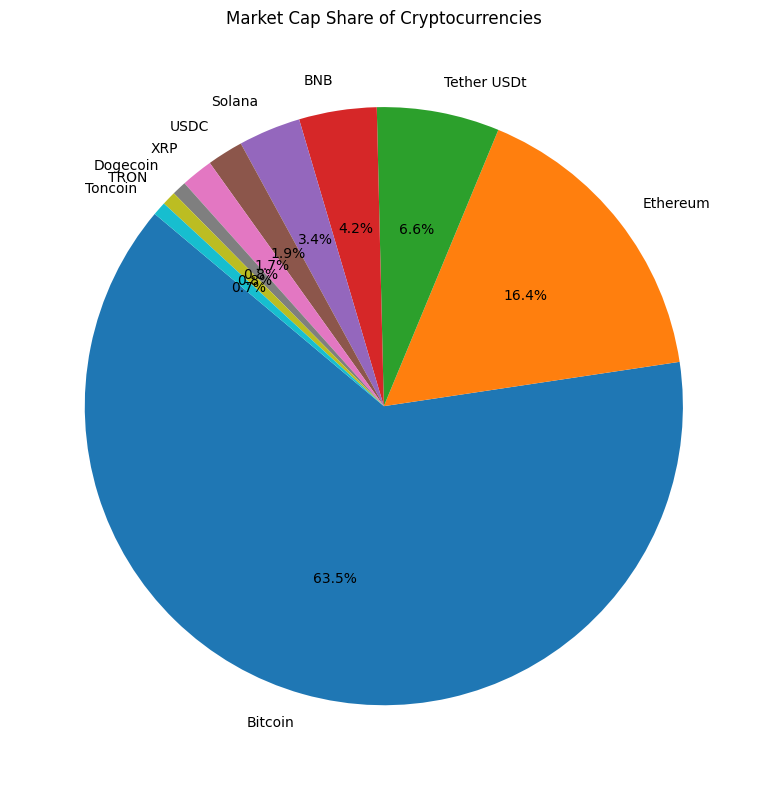

In [ ]:
latest_date = df['Date'].max()
df_latest = df[df['Date'] == latest_date]
df_latest = df_latest.groupby('Name')['Market Cap'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 8))
plt.pie(df_latest, labels=df_latest.index, autopct='%1.1f%%', startangle=140)
plt.title('Market Cap Share of Cryptocurrencies')
plt.tight_layout()
plt.show()

#4. Examine features’ distribution

###Original Data Feature Distributions

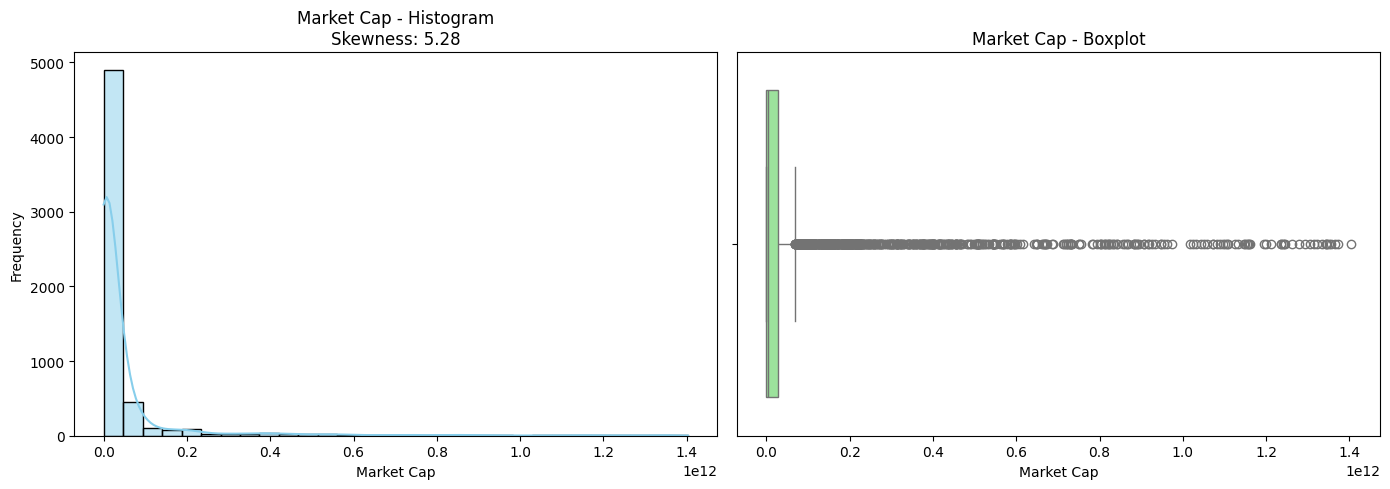

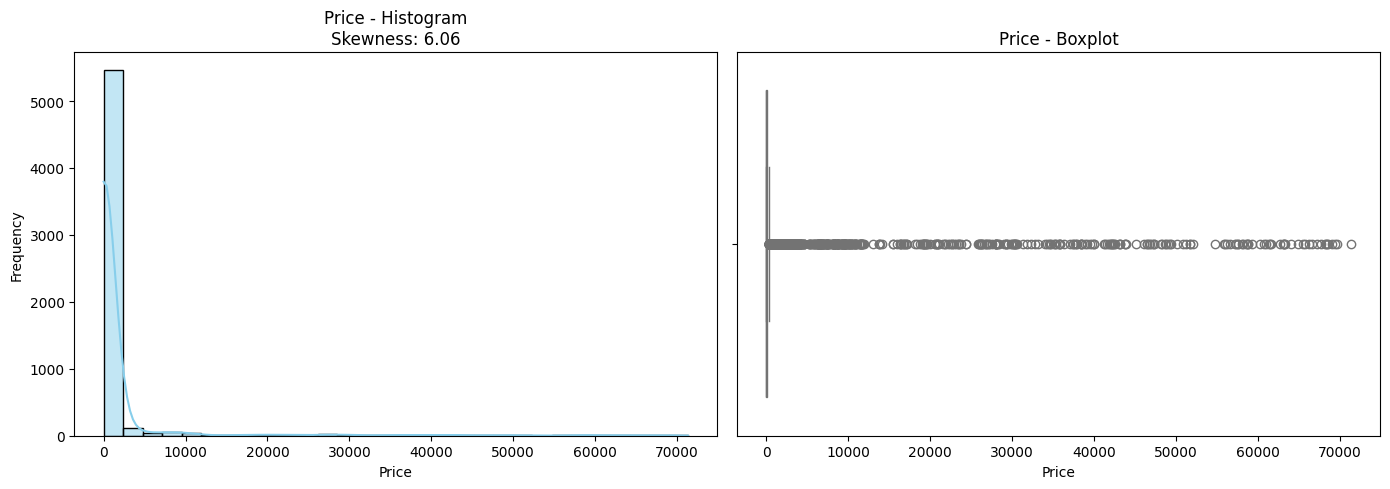

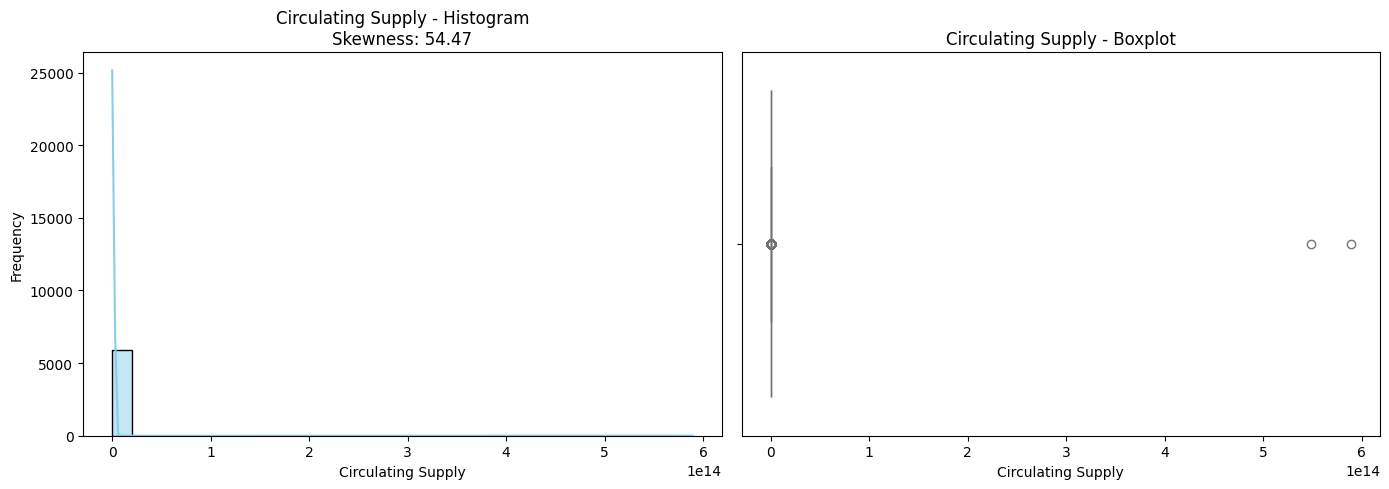

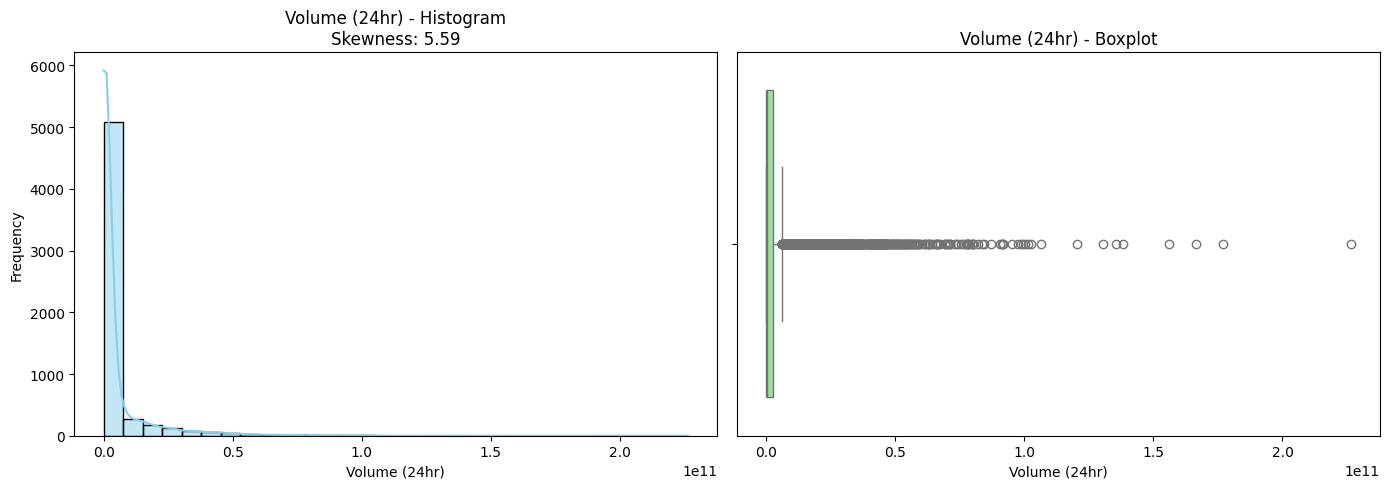

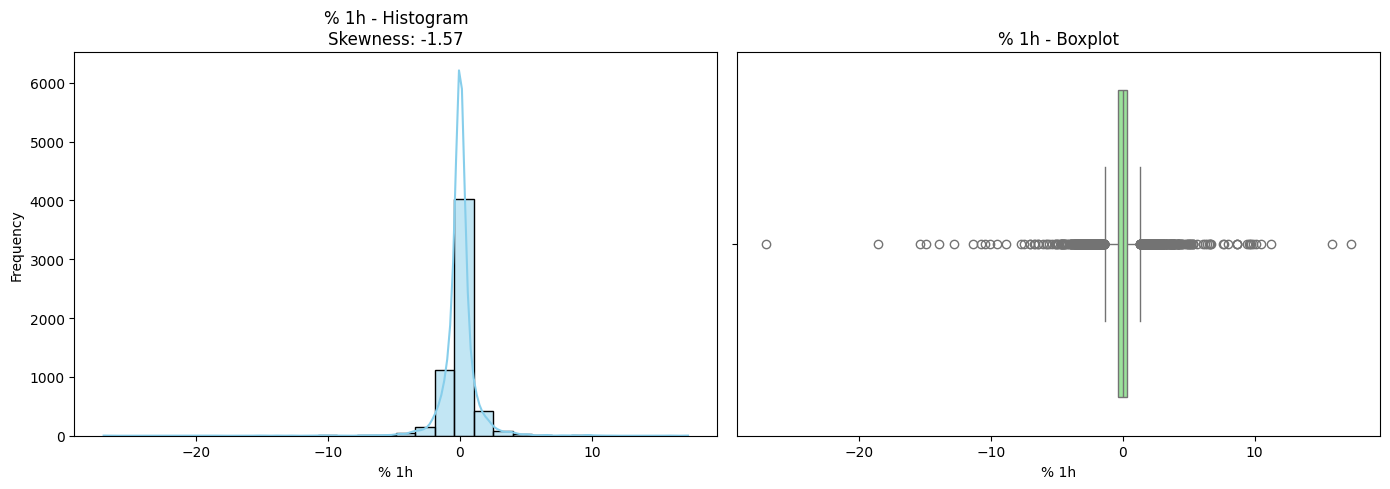

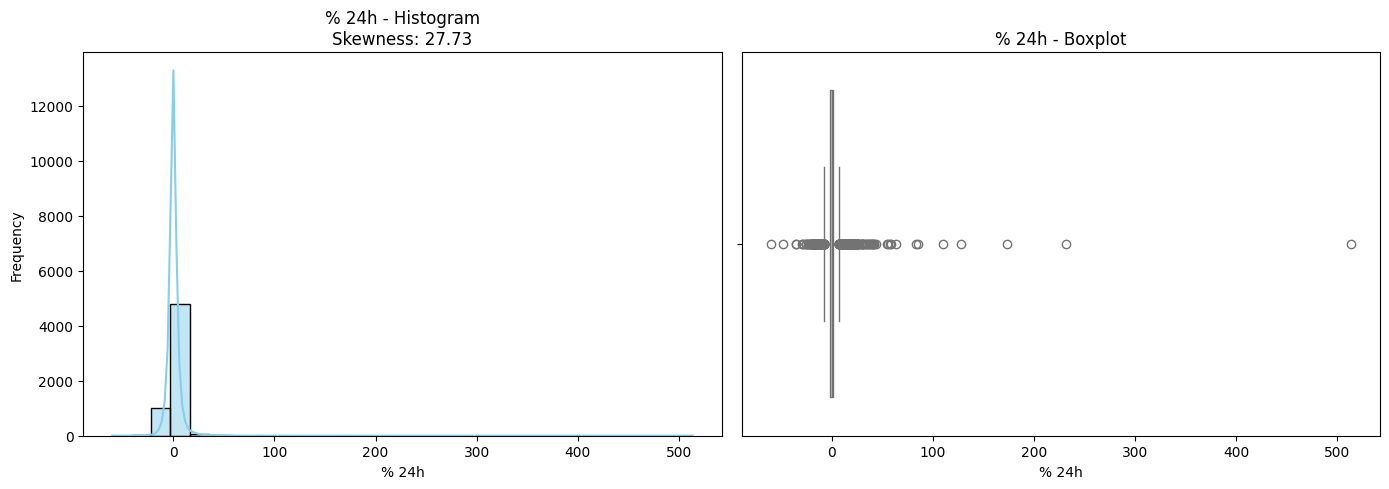

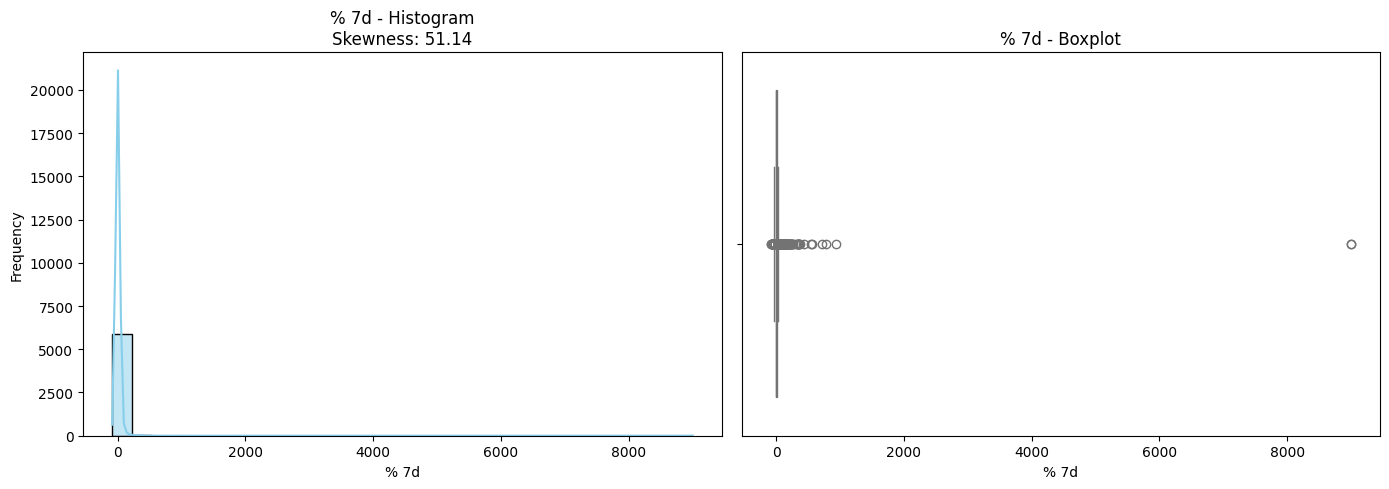

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

def visualize_skewness_raw(df, columns):
    for col in columns:
        data = df[col].dropna()

        # Calculate skewness
        sk = skew(data)

        # Plot histogram with KDE and boxplot
        fig, axs = plt.subplots(1, 2, figsize=(14, 5))

        # Histogram + KDE
        sns.histplot(data, kde=True, ax=axs[0], bins=30, color='skyblue')
        axs[0].set_title(f'{col} - Histogram\nSkewness: {sk:.2f}', fontsize=12)
        axs[0].set_xlabel(col)
        axs[0].set_ylabel('Frequency')

        # Boxplot
        sns.boxplot(x=data, ax=axs[1], color='lightgreen')
        axs[1].set_title(f'{col} - Boxplot', fontsize=12)
        axs[1].set_xlabel(col)

        plt.tight_layout()
        plt.show()
# Choose your numerical columns
columns =  ['Market Cap',	'Price',	'Circulating Supply',	'Volume (24hr)',	'% 1h','% 24h',	'% 7d']
visualize_skewness_raw(df, columns)

### Data Cleaning : Handling Outliers

In [ ]:
import pandas as pd

# Columns to handle
columns = ['Market Cap', 'Price', 'Circulating Supply', 'Volume (24hr)', '% 1h', '% 24h', '% 7d']

for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    print(f"{col}: Capped values outside [{lower_bound:.2f}, {upper_bound:.2f}]")

print("\nOutliers capped successfully.")


Market Cap: Capped values outside [-41581824415.65, 69663621806.07]
Price: Capped values outside [-202.51, 338.35]
Circulating Supply: Capped values outside [-38841769839.50, 64788374764.50]
Volume (24hr): Capped values outside [-3686958139.53, 6150880508.55]
% 1h: Capped values outside [-1.38, 1.34]
% 24h: Capped values outside [-7.69, 7.48]
% 7d: Capped values outside [-26.33, 26.92]

Outliers capped successfully.


###Feature Distribution after Data Cleaning

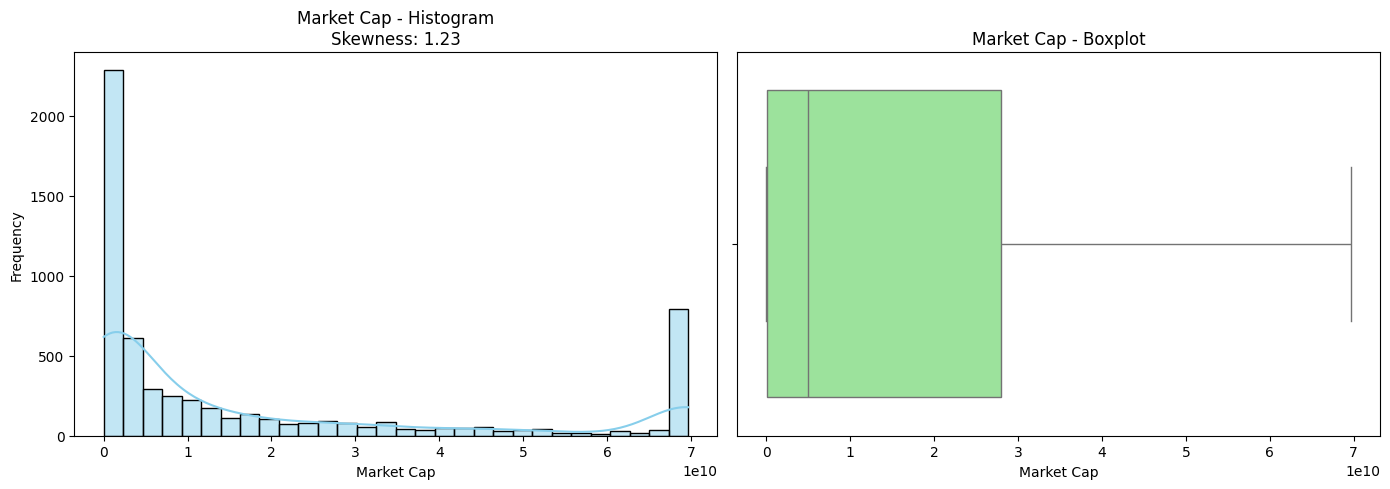

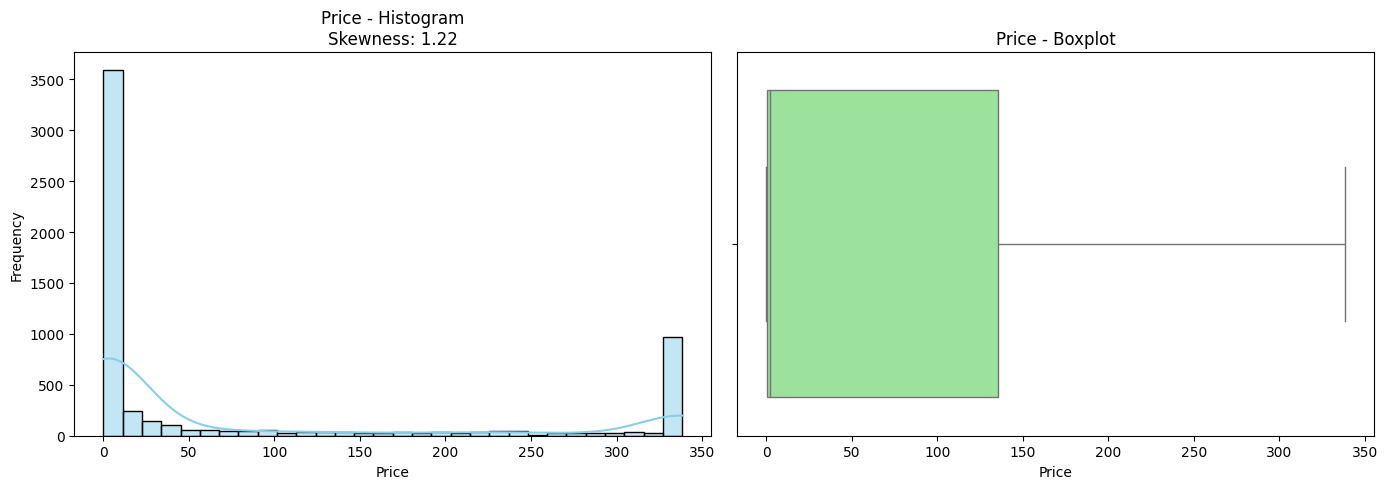

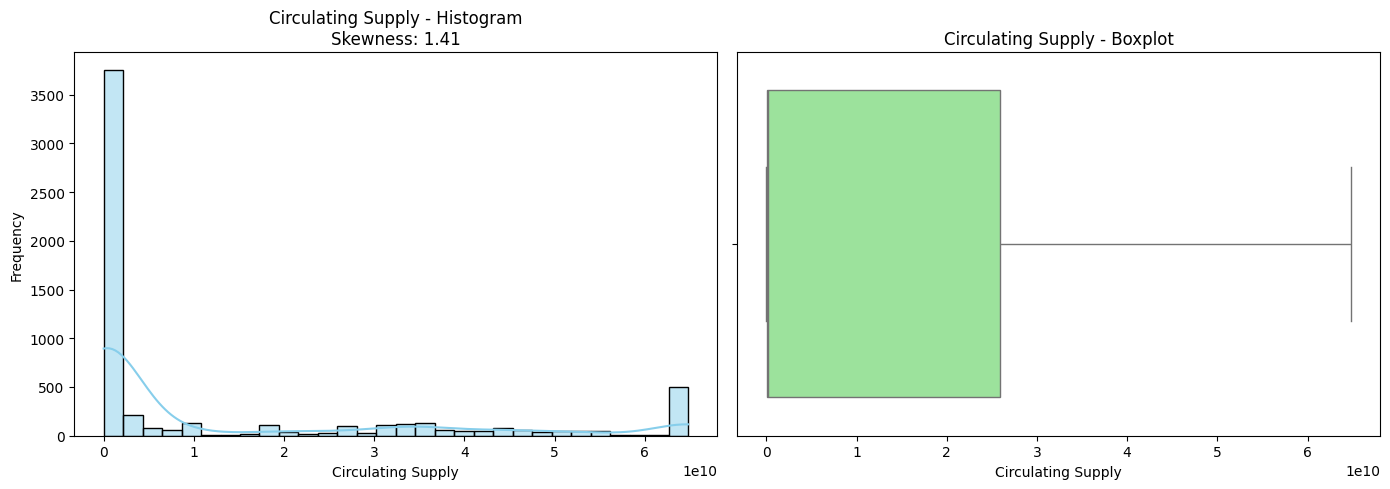

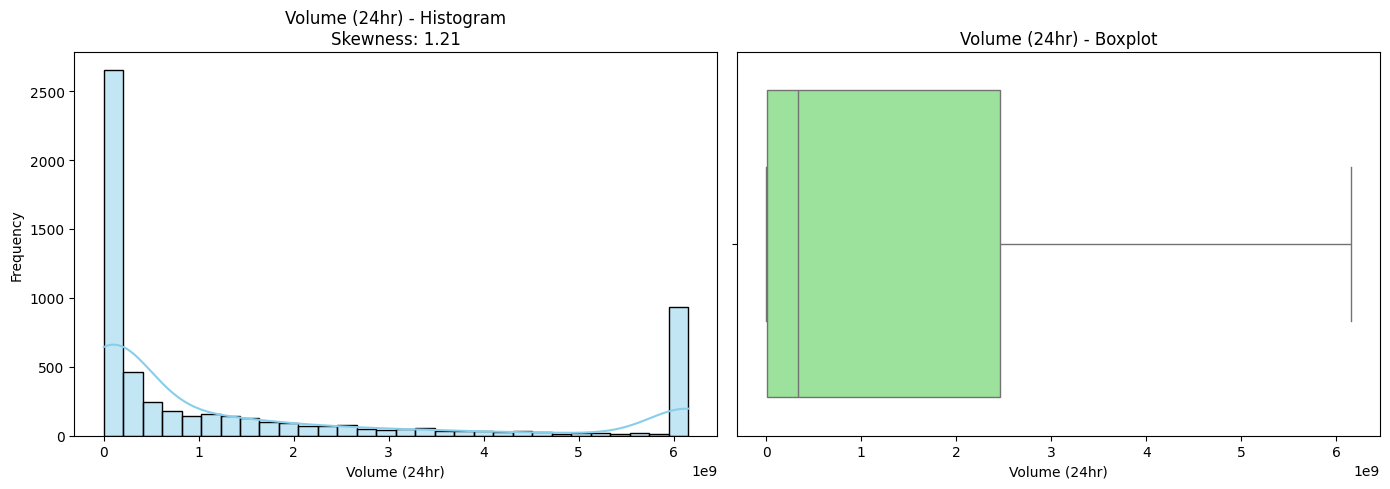

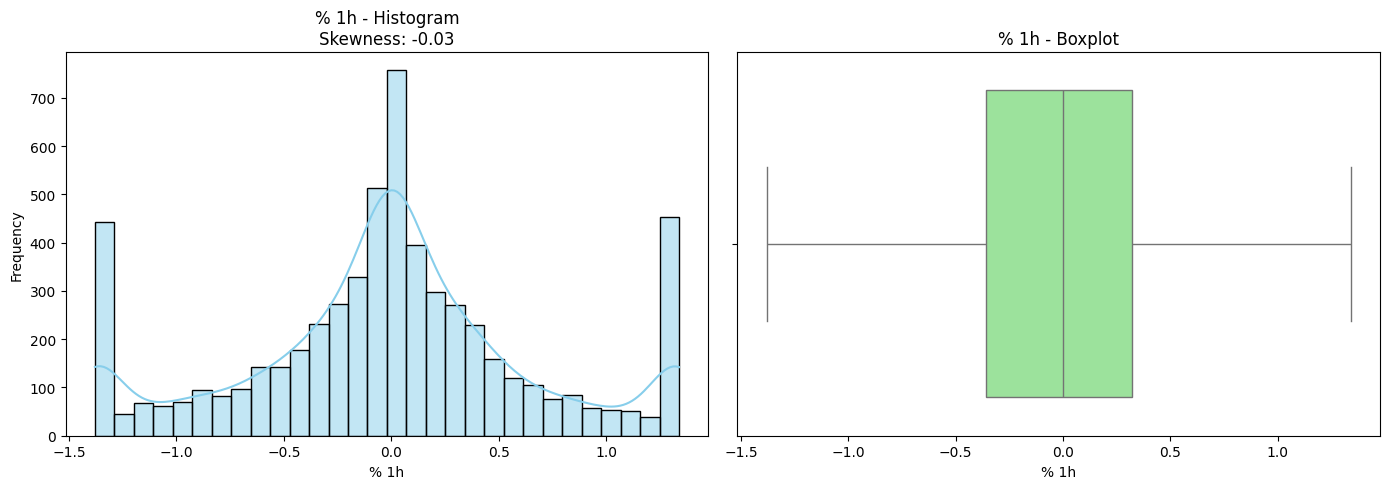

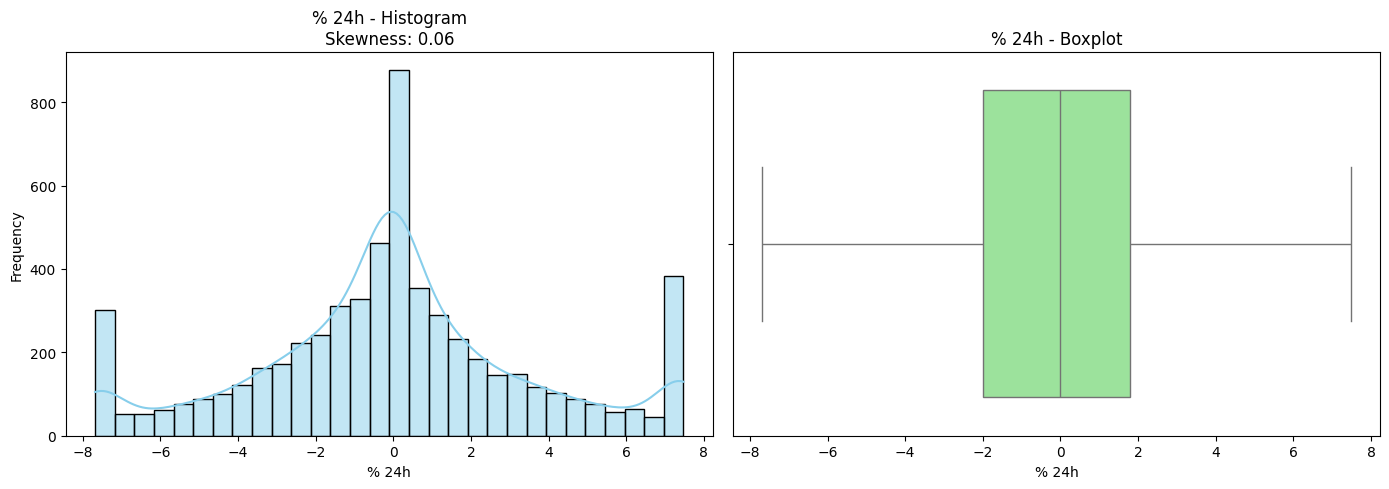

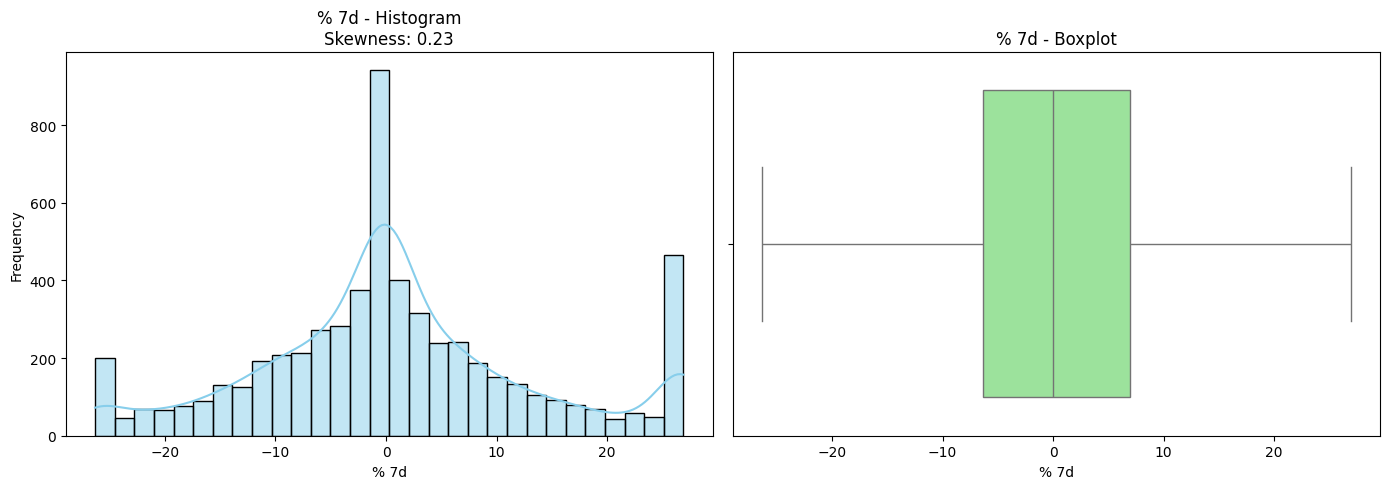

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

def visualize_skewness_raw(df, columns):
    for col in columns:
        data = df[col].dropna()

        # Calculate skewness
        sk = skew(data)

        # Plot histogram with KDE and boxplot
        fig, axs = plt.subplots(1, 2, figsize=(14, 5))
        # Histogram + KDE
        sns.histplot(data, kde=True, ax=axs[0], bins=30, color='skyblue')
        axs[0].set_title(f'{col} - Histogram\nSkewness: {sk:.2f}', fontsize=12)
        axs[0].set_xlabel(col)
        axs[0].set_ylabel('Frequency')

        # Boxplot
        sns.boxplot(x=data, ax=axs[1], color='lightgreen')
        axs[1].set_title(f'{col} - Boxplot', fontsize=12)
        axs[1].set_xlabel(col)

        plt.tight_layout()
        plt.show()
# Choose your numerical columns
columns =  ['Market Cap',	'Price',	'Circulating Supply',	'Volume (24hr)',	'% 1h','% 24h',	'% 7d']
visualize_skewness_raw(df, columns)

#5. Feature Selection based on correlation, covariance

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Select only numerical features (exclude target and non-numerical if needed)
numerical_cols = ['Price', 'Market Cap', 'Circulating Supply',
       'Volume (24hr)', '% 1h', '% 24h', '% 7d']

In [ ]:
corr_matrix = df[numerical_cols].corr()

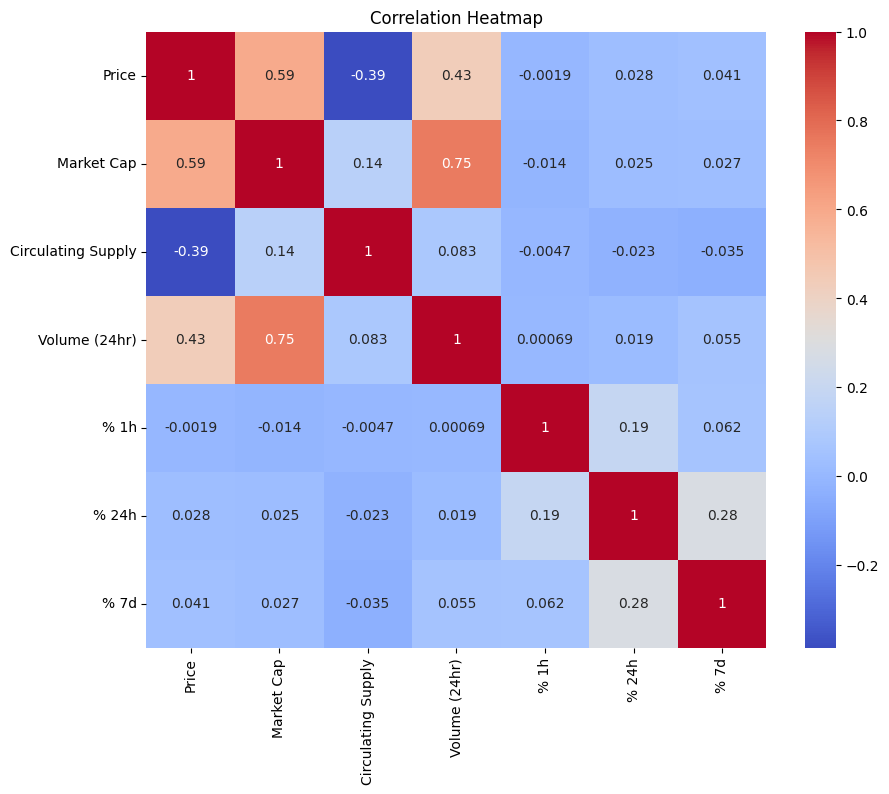

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

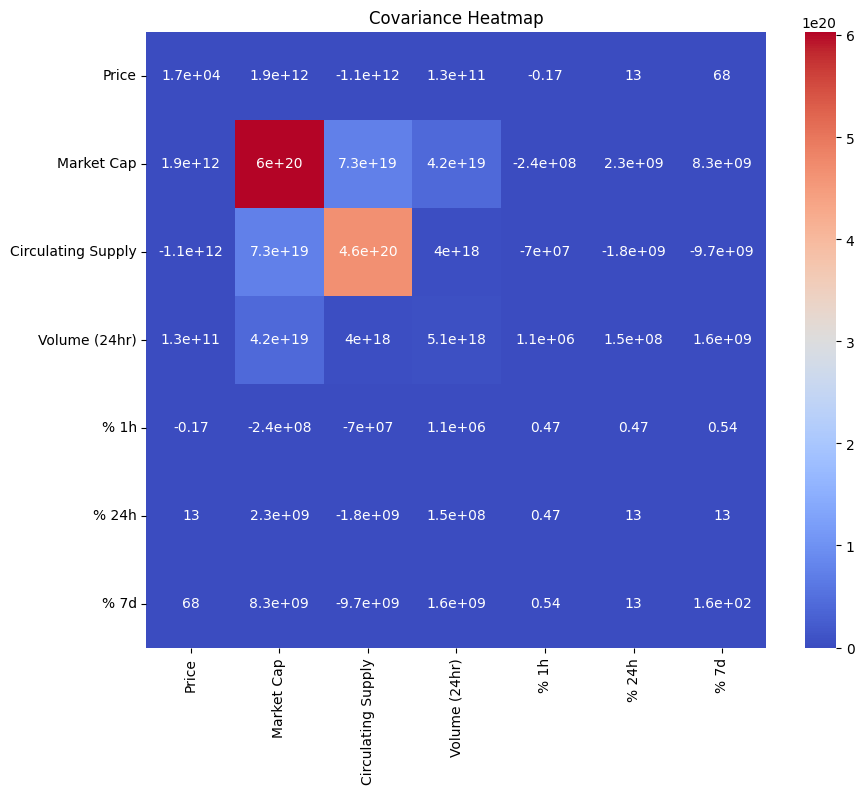

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].cov(), annot=True, cmap='coolwarm')
plt.title('Covariance Heatmap')
plt.show()

In [ ]:
# Identify highly correlated feature pairs (Pearson > |0.85|)
high_corr_features = set()
threshold_corr = 0.7
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > threshold_corr:
            high_corr_features.add((col1, col2, corr_val))

In [ ]:
# Store feature pairs for redundancy removal
redundant_features = set()
for feature1, feature2, _ in high_corr_features:
  redundant_features.add(feature1) # Arbitrarily dropping the first feature in the pair

# Get final selected features
selected_features = [feat for feat in numerical_cols if feat not in redundant_features]
selected_features

['Price', 'Market Cap', 'Circulating Supply', '% 1h', '% 24h', '% 7d']

In [ ]:
# Dropping Leaky feature: % 24h
selected_features.remove('% 24h')
selected_features

['Price', 'Market Cap', 'Circulating Supply', '% 1h', '% 7d']

#6. Handling date time

In [ ]:
df.dtypes

,0
Date,datetime64[ns]
Name,object
Symbol,object
Market Cap,float64
Price,float64
Circulating Supply,float64
Volume (24hr),float64
% 1h,float64
% 24h,float64
% 7d,float64


---------- Date column is already in 'datetime' format. ----------

###Cryptocurrency %Change Yearly

Cryptocurrency Coin Names:
Bitcoin              Litecoin             Peercoin             Namecoin             Terracoin            Devcoin              Novacoin             Feathercoin          
Freicoin             Mincoin              CHNCoin              Digitalcoin          Yacoin               Primecoin            XRP                  Infinitecoin         
Bullion              WorldCoin            BitShares PTS        Quark                Megacoin             Nxt                  Omni                 Dogecoin             
Counterparty         Auroracoin           SpainCoin            Aphroditecoin        BlackCoin            Dash                 Startcoin            Bytecoin             
XCurrency            MaidSafeCoin         BitShares            PayCoin              Stellar              NuShares             Monero               Banx                 
Ethereum             TRMB                 Factom               Emercoin             HyperSpace           NEM                  Di

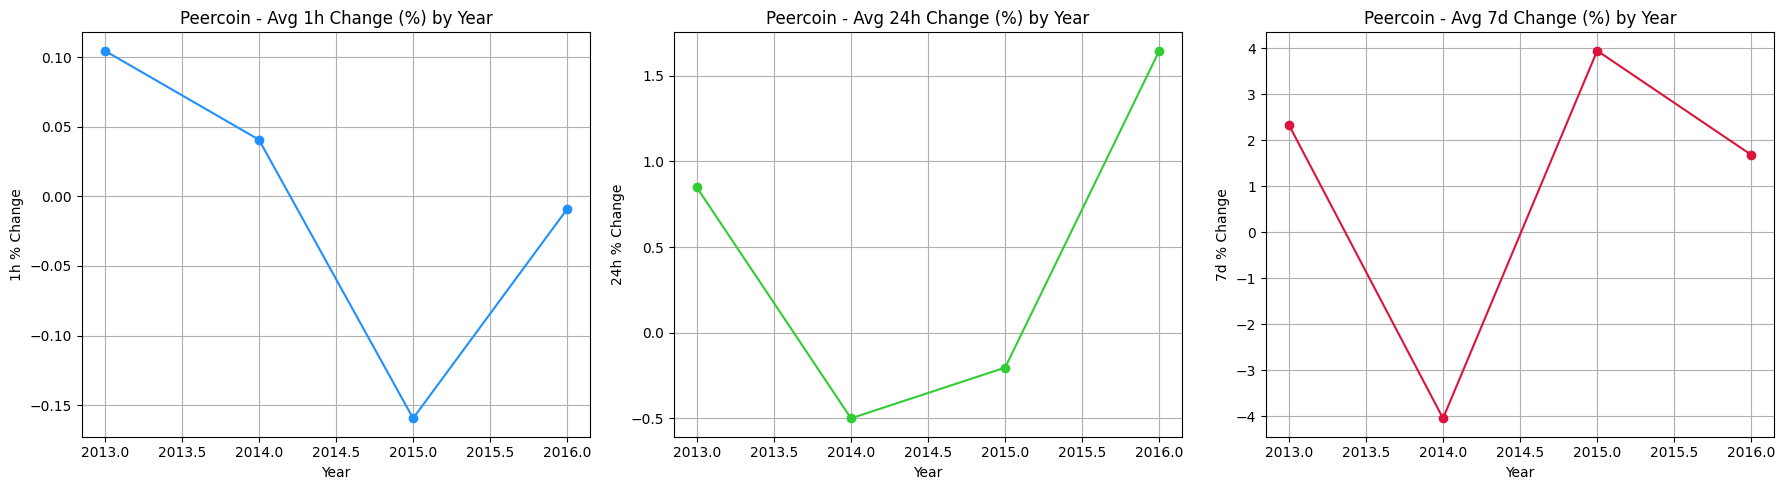

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_coin_trends(df, coin_name):
    df_datetime = df.copy()

    # Filter for the selected coin
    coin_data = df_datetime[df_datetime['Name'].str.lower() == coin_name.lower()].copy()

    # Extract Year from Date
    coin_data['Year'] = coin_data['Date'].dt.year

    # Group by Year and compute average % changes
    yearly = coin_data.groupby('Year').agg({
        '% 1h': 'mean',
        '% 24h': 'mean',
        '% 7d': 'mean'
    }).reset_index()

    # Plotting
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 3, 1)
    plt.plot(yearly['Year'], yearly['% 1h'], marker='o', color='dodgerblue')
    plt.title(f'{coin_name} - Avg 1h Change (%) by Year')
    plt.xlabel('Year')
    plt.ylabel('1h % Change')
    plt.grid(True)

    plt.subplot(1, 3, 2)
    plt.plot(yearly['Year'], yearly['% 24h'], marker='o', color='limegreen')
    plt.title(f'{coin_name} - Avg 24h Change (%) by Year')
    plt.xlabel('Year')
    plt.ylabel('24h % Change')
    plt.grid(True)

    plt.subplot(1, 3, 3)
    plt.plot(yearly['Year'], yearly['% 7d'], marker='o', color='crimson')
    plt.title(f'{coin_name} - Avg 7d Change (%) by Year')
    plt.xlabel('Year')
    plt.ylabel('7d % Change')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

print("Cryptocurrency Coin Names:")
names = df["Name"].unique()
for i, name in enumerate(names, 1):
    print(f"{name:<20}", end=" ")
    if i % 8 == 0:
        print()  # New line after every 10 entries
print('\n')

coin_name=input("Enter the name of the coin: ")
plot_coin_trends(df, coin_name)


#7. Models Creation ( At Least two)

In [ ]:
#Splitting into dependent/independent variables
X = df[selected_features]
y = df['Trend']

In [ ]:
#Splitting into training, testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
#Normalization
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
X_train_scaled = robust_scaler.fit_transform(X_train)
X_test_scaled = robust_scaler.transform(X_test)

### Model 1: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C=1.0, solver='lbfgs', max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

### Model 2 : Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

### Model 3 : Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(C=1.0, kernel='rbf', gamma='scale', class_weight='balanced', random_state=42)
svm_clf.fit(X_train_scaled, y_train)
y_pred_svm = svm_clf.predict(X_test_scaled)

#8. Evaluation of the model based on various metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

def evaluate_model(name, y_true, y_pred, y_proba=None):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "ROC AUC": roc_auc_score(y_true, y_proba) if y_proba is not None else 'N/A'
    }

# Probabilities (required for ROC AUC)
log_proba = log_reg.predict_proba(X_test_scaled)[:, 1]
rf_proba = rf.predict_proba(X_test)[:, 1]
svm_proba = svm_clf.decision_function(X_test_scaled)  # Not predict_proba for SVC with default settings

# Evaluate each model
results = [
    evaluate_model("Logistic Regression", y_test, y_pred_log, log_proba),
    evaluate_model("Random Forest", y_test, y_pred_rf, rf_proba),
    evaluate_model("SVM", y_test, y_pred_svm, svm_proba),
]

# Create a DataFrame for pretty output
results_df = pd.DataFrame(results)
pd.options.display.float_format = '{:.3f}'.format
print(results_df.to_string(index=False))

              Model  Accuracy  Precision  Recall  F1 Score  ROC AUC
Logistic Regression     0.742      0.672   0.120     0.203    0.715
      Random Forest     0.757      0.598   0.356     0.446    0.782
                SVM     0.715      0.486   0.583     0.530    0.759


#9. Final Selection of the Model

**Recall**: Catch as many true positives (Trend = 1) as possible.

**F1 Score**: Good trade-off between precision and recall.

**ROC AUC**: General performance across thresholds.

Key metrics: **F1 Score > Recall > ROC AUC**

**Final Decision**: Select ***Random Forest Classifier*** as the final model.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")

Accuracy: 0.757
Precision: 0.598
Recall: 0.356
F1 Score: 0.446
ROC AUC: 0.782


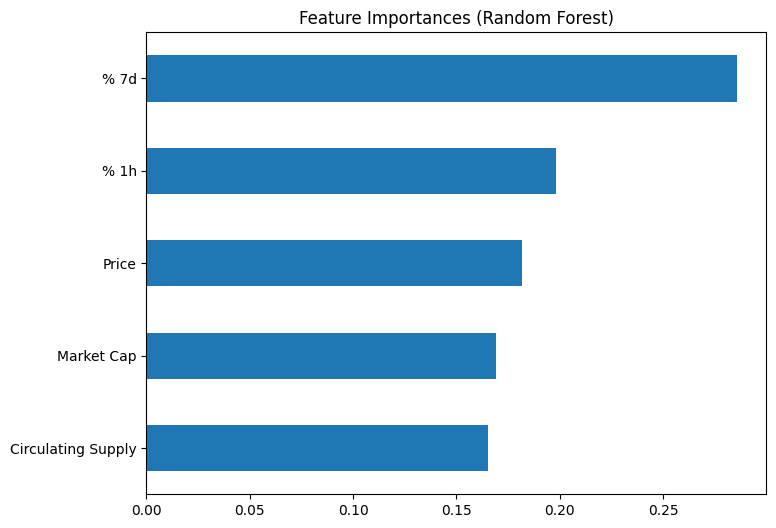

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title("Feature Importances (Random Forest)")
plt.show()


#10.Storytelling about the model/ results/ analysis/prediction

###**Cryptocurrency Price Trend Prediction**

**1. Data Scraping from CoinMarketCap**

The historical data is scraped directly from the CoinMarketCap website to fetch weekly snapshots of top cryptocurrencies to analyze their trends. Libraries like requests and BeautifulSoup are used to scrap the data. The data fetched consists of columns: Date, Name and Symbol of cryptocurrency, Market Capital, Price, Circulating Supply, 24hr Volume, % Change in 1 Hour, 24 Hours, and 7 Days. The data was collected weekly on Sundays from April 2013 to March 2025 for 624 dates. For each date, data of 10 cryptocurrencies were collected using scrape_data() function. The scraped data was saved to a backup file and was converted to python DataFrame.

**2. Exploring the dataset**

The dataset contains 10 columns and 5917 entries. The datatype of each column is object. Only one column, Voulme (24hr) contains missing values.

**3. Data pre-processing**

* The Date column contain values of form ‘/historical/yyyymmdd’. For trend analysis, we need to extract date from the values. The date is extracted from the Data column and the column values is converted to datetime object.
* The columns like Market Cap, Price, Circulating Supply, Volume (24hr) contains string values with special characters which is required to be changed for future analysis .The special characters($,) are removed from the column values to further convert each column to numeric.
* If %change is smaller than 0.01%, the value written in this domain is ‘<0.01%’ for very small change. Hence, we need to convert this to a value so that the column can be converted to numeric.
* The columns like % 1d, % 24h, % 7d contains string values with special characters like <,>,%,-- which is required to be changed for future analysis . The special characters are replaced with 0 or stripped from the column values to further convert each column to numeric.
* The columns are required to convert to numeric data types, replacing invalid values with NaN.
* Missing values are present in Volumn (24hr) column. KNN Imputer is used to handle the missing values.
* The Name feature was label-encoded for model compatibility.
* A 'Trend' feature was created, classifying daily price changes as 'High' or 'Low' based on a 0.5% threshold. It was also label-encoded for model compatibility.

**4. Descriptive Statistical Analysis for centrality, spread and normality**

* Statistical Analysis revealed highly skewed distributions for most numerical features (Market Cap, Price, Circulating Supply, Volume).
* Most features has Mean greater than Median and high standard deviations.

**5. Visual Analysis**

* Count plot of different cryptocurrencies
    * It interprets that the dataset contains more entries of Bitcoin and XRP.
* Price Trend Over Time (Top 5 Cryptocurrencies)
    * It interprets that the price of Bitcoin has increased over years whereas Litecoin and Dogecoin’s price is stable over years.
* Market Cap vs Volume (24hr) of top 5 cryptocurrencies
    * It interprets that higher market cap coins are usually more traded.
* Price Spread Per Coin (Top 5)
    * It interprets significant price variation among the top 5 cryptocurrencies. Bitcoin is the most expensive and volatile coin, followed by Ethereum. Litecoin, XRP, and Dogecoin are much more affordable and show lower price volatility.
* Market Cap Share of Cryptocurrencies
    * It interprets that the cryptocurrency market is heavily dominated by Bitcoin, which alone holds over 63% of the total market cap. Ethereum holds over 16.4%. This dominance suggests that market trends are likely to be influenced significantly by Bitcoin and Ethereum's performance.

**6. Examine features’ distribution and Data Cleaning**

* Original features distribution was examined using histogram, kde plot and boxplot. We examined that most features contained too many outliers and were highly skewed.
* Outliers were handled by capping to IQR-based lower and upper bound.
* After capping, features were normally distributed.

**7. Feature Selection based on correlation, covariance**

* Based on correlation, one of feature of highly correlated pair is removed.
* here, correlation between ‘Volume (24hr)’ and ‘Market Cap’ is 0.75. Hence, Volume (24hr) is dropped.
* Also, leaky feature ‘% 24h’ is dropped as target column is made on this feature. Hence, it can cause bias in model training.

**8. Handling date time**

* The date column is already handled during preprocessing steps.
* Plot for trend of user given coin is displayed for change in 1h, 24h and 7d year-wise.

**9. Models Creation ( At Least two)**

* For model implementation, data is splitted into training and testing sets.
* The traing and testing sets were scaled using Robust Scaler for mornalized data.
* Three models were trained and tested: Logistic Regression, Random Forest Classifier, and Support Vector Machine.

**10. Evaluation of the model based on various metrics**

* The model performance is compared and evaluated using metrics like accuracy, precision, recall, F1 score, and ROC AUC.
* Based on the evaluation metrics, the Random Forest Classifier showed the best trade-off for accuracy and ROC AUC, making it the preferred model.

**11. Final Selection of the Model**

* Random Forest Classifier is selected as the final model with:
    * Accuracy: 0.757
    * Precision: 0.598
    * Recall: 0.356
    * F1 Score: 0.446
    * ROC AUC: 0.782


